# Notebook Contents
1. Importing Libraries and Data
2. Data Cleaning
3. Elbow Technique
4. K-means Clustering
5. Descriptive Statistics

# 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
#Ensuring the graphs created are displayed in your notebook without the need to "call" them specifically
%matplotlib inline

In [3]:
#Creating path
path =r'C:\Users\smflo\Documents\Gun Violence Analysis'

In [4]:
#Importing guns_clean_2.csv
df_guns = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','guns_clean_2.csv'), index_col = False)

# 2. Data Cleaning

In [5]:
#Viewing first 5 rows
df_guns.head()

,Unnamed: 0.1,Unnamed: 0,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,gun_type,incident_characteristics,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district,mass_shooting
0,0,0,461105,1/1/2013,Pennsylvania,Mckeesport,0,4,14.0,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,1,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN,1.0
1,1,1,460726,1/1/2013,California,Hawthorne,1,3,43.0,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",1,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0,1.0
2,2,2,478855,1/1/2013,Ohio,Lorain,1,3,9.0,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",2,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0,NaN
3,3,3,478925,1/5/2013,Colorado,Aurora,4,0,6.0,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",1,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0,NaN
4,4,4,478959,1/7/2013,North Carolina,Greensboro,2,2,6.0,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",2,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0,NaN


In [6]:
#Removing column 'Unnamed: 0'
df_guns.drop('Unnamed: 0', axis = 1, inplace = True)

In [7]:
#Removing column 'Unnamed: 0.1'
df_guns.drop('Unnamed: 0.1', axis = 1, inplace = True)

In [8]:
#Checking output
df_guns.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,gun_type,incident_characteristics,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district,mass_shooting
0,461105,1/1/2013,Pennsylvania,Mckeesport,0,4,14.0,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,1,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN,1.0
1,460726,1/1/2013,California,Hawthorne,1,3,43.0,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",1,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0,1.0
2,478855,1/1/2013,Ohio,Lorain,1,3,9.0,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",2,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0,NaN
3,478925,1/5/2013,Colorado,Aurora,4,0,6.0,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",1,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0,NaN
4,478959,1/7/2013,North Carolina,Greensboro,2,2,6.0,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",2,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0,NaN


In [9]:
#Removing all categorical variables
df_guns.drop(['incident_id', 'date', 'state', 'city_or_county', 'gun_type', 'incident_characteristics', 'participant_age', 'participant_age_group', 'participant_gender', 'participant_status', 'participant_type'], axis = 1, inplace = True)

In [10]:
#Checking for missing values
df_guns.isnull().sum()

n_killed                       0
n_injured                      0
congressional_district     11944
n_guns_involved                0
state_house_district       38772
state_senate_district      32335
mass_shooting             238040
dtype: int64

In [11]:
#Filling in missing values with "0"
df_guns['mass_shooting'].fillna(0, inplace=True)

In [12]:
#Removing variables due to missing data 
df_guns.drop(['congressional_district', 'state_house_district', 'state_senate_district'], axis = 1, inplace = True)

# 3. Elbow Technique

In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [14]:
score = [kmeans[i].fit(df_guns).score(df_guns) for i in range(len(kmeans))] # Creates a score that represents
# a rate of variation for the given cluster option.

score

[-3271560.8871522415,
 -1358104.6552102026,
 -749765.0547709632,
 -486638.4666431353,
 -395589.8610100194,
 -304945.3127799195,
 -250269.0242465578,
 -208301.15381771384,
 -175116.65589797188]

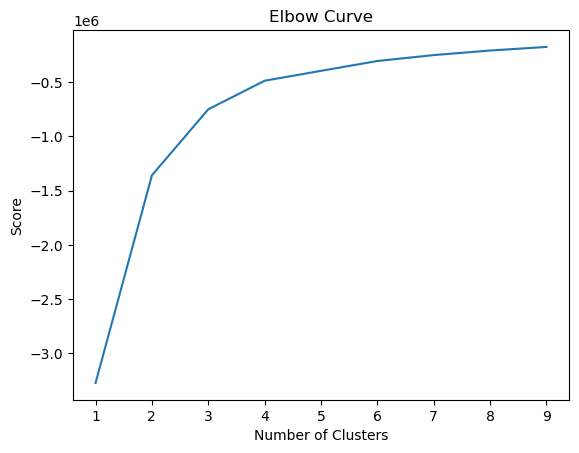

In [15]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The line curves and starts to flatten around 4 so I will do 4 clusters.

# 4. K-means Clustering

In [16]:
#Creating the k-means object
kmeans = KMeans(n_clusters = 4) 

In [17]:
#Fitting the k-means object to the data
kmeans.fit(df_guns)

KMeans(n_clusters=4)

In [18]:
#Creating a column in the dataframe with values corresponding to which cluster every observation belongs
df_guns['clusters'] = kmeans.fit_predict(df_guns)

In [19]:
#Checking output of column created
df_guns.head()

,n_killed,n_injured,n_guns_involved,mass_shooting,clusters
0,0,4,1,1.0,0
1,1,3,1,1.0,0
2,1,3,2,0.0,0
3,4,0,1,0.0,0
4,2,2,2,0.0,0


In [20]:
#Checking value counts of each cluster
df_guns['clusters'].value_counts()

0    238831
3       785
2        46
1        15
Name: clusters, dtype: int64

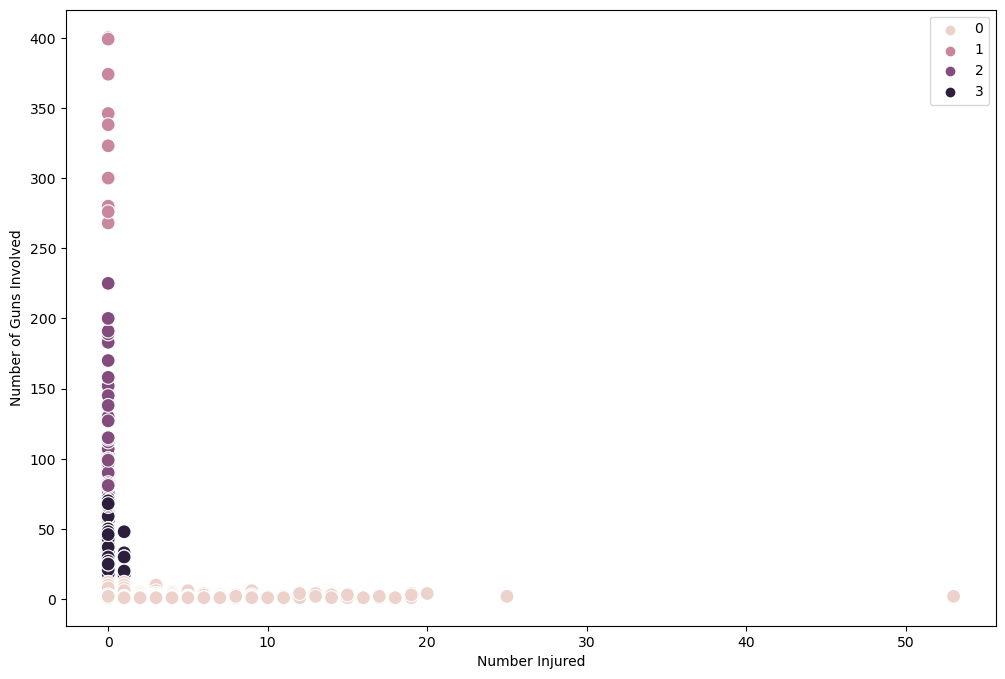

In [21]:
#Plotting the clusters for the "n_injured" and "n_guns_involved" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_guns['n_injured'], y=df_guns['n_guns_involved'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Number Injured') 
plt.ylabel('Number of Guns Involved') 
plt.show()

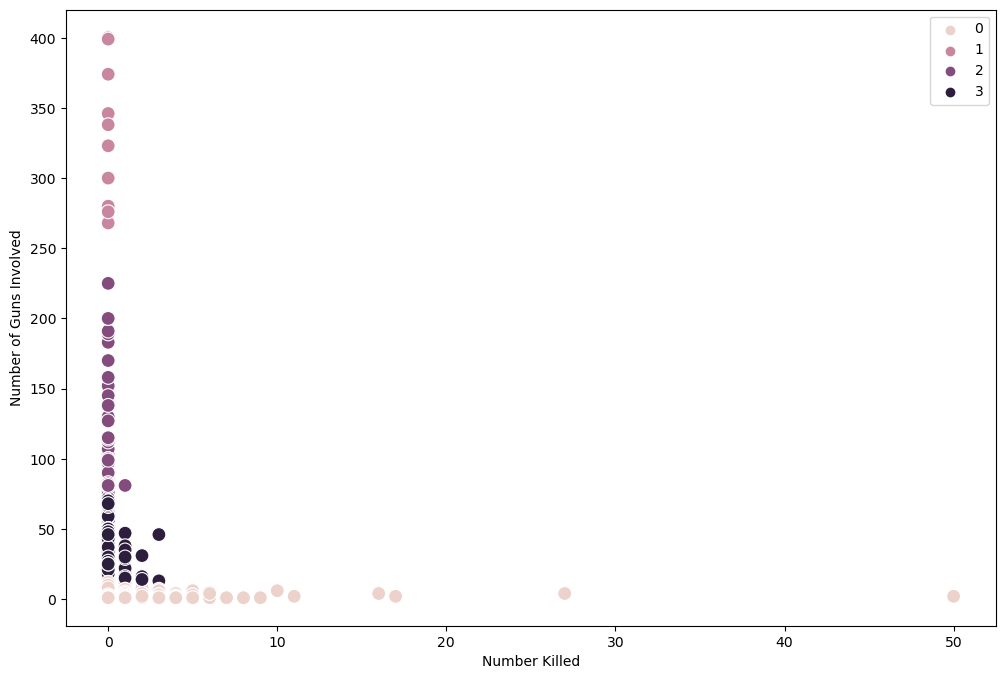

In [22]:
#Plotting the clusters for the "n_killed" and "n_guns_involved" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_guns['n_killed'], y=df_guns['n_guns_involved'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Number Killed') 
plt.ylabel('Number of Guns Involved') 
plt.show()

### Observations

Both of the plots are fairly similar to one another. Most of the gun violence incidents involve less than 200 guns involved and less than 5 people injured or killed. You can see by looking at the plots that the number of people injured or killed does not increase as the number of guns involved increases. The light pink color represents approximately 1-19 guns involved, black is about 20-69, dark purple is about 70-200, and pink is about 200+ guns involved.

# 5. Descriptive Statistics

In [23]:
#Relabeling clusters from numbers to colors
df_guns.loc[df_guns['clusters'] == 3, 'cluster'] = 'black'
df_guns.loc[df_guns['clusters'] == 2, 'cluster'] = 'dark purple'
df_guns.loc[df_guns['clusters'] == 1, 'cluster'] = 'pink'
df_guns.loc[df_guns['clusters'] == 0, 'cluster'] = 'light pink'

In [24]:
#Calculating descriptive statistics
df_guns.groupby('cluster').agg({'n_killed':['mean', 'median'], 
                         'n_injured':['mean', 'median'], 
                         'n_guns_involved':['mean', 'median'],
                          'mass_shooting':['mean', 'median']})

n_killed        n_injured        n_guns_involved         \
                 mean median      mean median            mean median   
cluster                                                                
black        0.028025    0.0  0.010191    0.0       24.717197   21.0   
dark purple  0.021739    0.0  0.000000    0.0      117.586957  100.0   
light pink   0.253087    0.0  0.495723    0.0        1.096956    1.0   
pink         0.000000    0.0  0.000000    0.0      340.266667  338.0   

            mass_shooting         
                     mean median  
cluster                           
black            0.000000    0.0  
dark purple      0.000000    0.0  
light pink       0.006854    0.0  
pink             0.000000    0.0

### Observations
n_killed and n_injured doesn't really change per cluster. n_guns_involved is the only variable really cefining these clusters. The number of guns involved does not affect the number of people killed or injured in a gun violence incident. This means that the more guns there are involved in a mass shooting that does not equate to more people killed or injured. 